# K-Means

## Configurações Iniciais

Comando para exibir os gráficos gerados no próprio *notebook* e também configurações de exibição dos gráficos a serem gerados.

In [1]:
%matplotlib inline

Pacotes que serão usados para importação do *dataset*, exibição de gráficos, separação de dados entre treinamento e teste, método de redução de dimensionalidade e método de clusterização

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from random import randint
import numpy
from math import sqrt, pow
from sklearn.model_selection import KFold
from sklearn import metrics

Configurações prévias de *layout* de gráficos a serem aplicados a todos os gráficos gerados.

In [3]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Função que será utilizada para plotar os agrupamentos com centróides no decorrer do Jupyter

In [4]:
def printarComCentroides(x, y, centroides, titulo):
    plt.figure()
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap='jet_r', s=100, alpha=0.5)
    plt.scatter(x=centroides[:,0], y=centroides[:,1], c='r', marker='X')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(titulo)    
    plt.show()

## Dataset

Importação do dataset *Wine Recognition*.

In [5]:
dataset = datasets.load_wine()

Atribuição as variáveis X e y os dados e o elemento *target*, respectivamente.

In [6]:
x = dataset.data
y = dataset.target

Visualizando os dados em duas dimensões

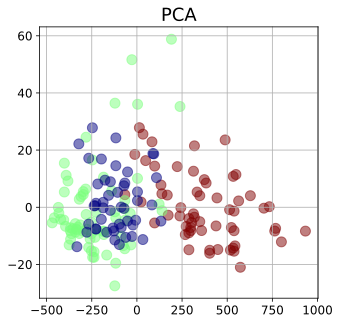

In [7]:
#Aplicando o PCA para transformar os dados de treza para duas dimensões
xPCA = PCA(n_components = 2).fit_transform(x)
plt.scatter(x=xPCA[:, 0], y=xPCA[:, 1], c=y, cmap='jet_r', s=100, alpha=0.5)
plt.title('PCA')
plt.grid(True)
plt.show()

## Implementação realizada pelo grupo

In [8]:
class KMeansImplementado:
    
    
    def gerarCentroidesAleatorios(self, data, k):
        #A primeira coisa a fazer é descobrir quantos dados há
        qtdDados = data.shape[0]

        #Preciso de k centroides. Esses centroides serao pontos aleatórios de data
        self.vetorCentroides = []

        # O for vai gerar os k centróides.
        for i in range(0, k):

            # Escolhendo um ponto aleatoriamente para ser um novo centroide
            novoCentroide = data[randint(0, qtdDados - 1)]

            # Enquanto o centróide for repetido, eu seleciono outro ponto para ser o novoCentroide
            while any(numpy.array_equal(novoCentroide, centroideAtual) for centroideAtual in self.vetorCentroides):
                novoCentroide = data[randint(0, qtdDados - 1)]                

            # Agora que já tenho um ponto para ser um centroide, irei adicioná-lo ao vetorCentroides
            self.vetorCentroides.append(novoCentroide)                      

        # Com o vetorCentroides pronto, posso tranformá-lo num array numpy e retorná-lo
        self.vetorCentroides = numpy.array(self.vetorCentroides)
    
    
    def definirCluster(self, ponto):
        # Definindo quantos clusters existem e de quantas dimensões são os dados
        # A variável indexCentroideMaisProximo ira definir qual é o cluster a qual o ponto pertence
        qtdDimensoes = ponto.shape[0]
        qtdCentroides = self.vetorCentroides.shape[0]
        indexCentroideMaisProximo = -1
        menorDistancia = -1

        # Percorrendo cada um dos centroides para calcular a distancia
        for indexCentroideAtual in range(0, qtdCentroides):

            # Para cada dimensão, devo somar o quadrado da distancia entre o ponto e o centroide atual
            # d = sqrt((ponto[0] - centroide[0])^2 + (ponto[1] - centroide[1])^2 + (ponto[n] - centroide[n])^2)
            somaQuadrados = 0
            for dimensao in range(0, qtdDimensoes):
                somaQuadrados += pow(ponto[dimensao] - self.vetorCentroides[indexCentroideAtual][dimensao], 2)

            # Ao final, a distância do ponto até o centroide atual será a raiz da soma dos quadrados de cada dimensão
            distanciaAtual = sqrt(somaQuadrados)

            # Verificando se algum centroide teve uma distância menor
            # Primeiro, se o centroide atual é o primeiro centroide das iterações, ele automaticamente é o melhor
            if indexCentroideAtual == 0:
                indexCentroideMaisProximo = 0
                menorDistancia = distanciaAtual

            # Se a distancia atual for menor que a menor distância de todas até agora, 
            # então temos um novo melhor centroide
            if distanciaAtual < menorDistancia:
                indexCentroideMaisProximo = indexCentroideAtual
                menorDistancia = distanciaAtual     

        # Depois de verificar todos os centroides, já tenho o index do centroide mais próximo ao ponto,
        # e esse index é justamente o cluster a qual o ponto irá pertencer
        return indexCentroideMaisProximo
    
    
    def predizerDados(self, data):
        y = []    

        # Verificando para cada ponto, qual é o seu cluster
        for ponto in data:
            y.append(self.definirCluster(ponto))

        y = numpy.array(y)

        return y
    
    
    def definirCentroidePorPontos(self, pontos):
        qtdDimensoes = pontos.shape[1]

        centroCadaDimensao = []

        # É só criar um vetor em que cada dimensão é a média de cada dimensão dos pontos
        for dimensao in range(0, qtdDimensoes):
            centroCadaDimensao.append(numpy.mean(pontos[:,dimensao]))

        return numpy.array(centroCadaDimensao)
    
    
    def recalcularCentroides(self, x, y, qtdClusters):
        # Criando o vetor de centroides novos
        centroidesNovos = []

        # Para cada cluster irei recalcular seu centróide
        for clusterAtual in range(0, qtdClusters):

            # Preciso saber quais pontos pertencem ao cluster atual
            pontosDoClusterAtual = []
            for index, clusterY in enumerate(y):
                if clusterY == clusterAtual:
                    pontosDoClusterAtual.append(x[index])

            # Transformando em um array numpy
            pontosDoClusterAtual = numpy.array(pontosDoClusterAtual)

            # Recalculando o centroide do cluster atual de acordo com os pontos que acabamos de achar
            centroidesNovos.append(self.definirCentroidePorPontos(pontosDoClusterAtual))

        # Retornando os novos centroides no formato array numpy
        #centroidesNovos = numpy.array(centroidesNovos)

        self.vetorCentroides = numpy.array(centroidesNovos)
    
    
    def kMeans(self, data, kClusters):
        #gerando os centroides iniciais aleatórios
        self.gerarCentroidesAleatorios(data, kClusters)

        #gerando o "target"
        y = self.predizerDados(data)

        #recalculando os centroides até que sejam iguais
        continuar = True

        # Enquanto os centroides anteriores não forem iguais aos centroides novos...
        while continuar:
            # Centroides antigos passam a ser o self.vetorCentroides já que para gerar o Y devo manter os 
            # centroides atualizados em self.vetorCentroides
            centroidesAntigos = self.vetorCentroides
            
            # Recalculando os centroides (vai ser salvo em self.vetorCentroides)
            self.recalcularCentroides(data, y, kClusters)

            # Depois de ter os novos centroides, devo verificar a qual cluster cada dado pertence
            y = self.predizerDados(data)

            # Se os centroides novos forem iguais aos centroides antigos, então o algoritmo acabou
            if numpy.array_equal(centroidesAntigos, self.vetorCentroides):
                continuar = False

            # Senão, falo que os centroides antigos são os centroides novos para começar uma nova iteração
            #else:
                #self.vetorCentroides = centroidesNovos

        # Ao final, devo retornar o vetor target
        return y
    
    
    def WBIndex(self, x, y):
        ssw = self.sumSquaresWithin(x, y)
        ssb = self.sumSquaresBetween(x, y)
        return  (len(x) * (ssw/ssb))

    
    def sumSquaresWithin(self, x, y):

        distanciasAoQuadrado = []

        #Primeiro passando de cluster em cluster
        for clusterAtual in range(0, len(self.vetorCentroides)):

            #Pra cada cluster eu pego todos os pontos dele
            for index, clusterPontoAtual in enumerate(y):
                if clusterAtual == clusterPontoAtual:
                    #Se chegou aqui então eu estou em um ponto do cluster atual
                    d = x[index] - self.vetorCentroides[clusterAtual]
                    distanciasAoQuadrado.append(d * d)

        #Aqui já tenho o vetor distanciasAoQuadrado completo com todos os 
        #pontos em relação aos seus centroides, é só retornar a soma de tudo isso
        distanciasAoQuadrado = numpy.array(distanciasAoQuadrado)    

        return numpy.sum(distanciasAoQuadrado)

    
    def sumSquaresBetween(self, x, y):

        #Primeiro, tenho que achar o X médio de TODOS os pontos 
        #(embaixo da equação 3.9 (pág 24) tem uma representação visual desse x médio)
        xMedio = []
        for dimensaoAtual in range(0, x.shape[1]):
            xMedio.append(numpy.mean(x[:, dimensaoAtual]))
        xMedio = numpy.array(xMedio)

        #Beleza, agr já tenho o xMedio, é só aplicar a equação 3.8 e somar tudo como mostra a equação 3.9
        bs = []

        for clusterAtual in range(0, len(self.vetorCentroides)):
            #Preciso saber a quantidade de pontos que existem no cluster atual
            qtdPontosClusterAtual = 0
            for clusterPontoAtual in y:
                if clusterPontoAtual == clusterAtual:
                    qtdPontosClusterAtual += 1

            #agora aplico a equação 3.8...
            d = self.vetorCentroides[clusterAtual] - xMedio
            bs.append(qtdPontosClusterAtual * (d * d))

        #...e somo todos os B's como mostra a equação 3.9
        bs = numpy.array(bs)

        return numpy.sum(bs)
    
    
    def main(self, data, kClusters=3, nRepeticoes=15, printarIteracoes=False):    
        # Vetores que armazenarão os resultados de cada iteração
        wbs = []
        ys = []

        #para cada repetição vou receber o y da função kMeans e calcular o WBIndex
        for i in range(0, nRepeticoes):        
            y = self.kMeans(data, kClusters)
            wbs.append(self.WBIndex(data, y))
            ys.append(y)

        indexMenorWB = 0

        # Verificando qual iteração do algoritmo produziu os melhores resultados
        for index, wbAtual in enumerate(wbs):
            if wbAtual < wbs[indexMenorWB]:
                indexMenorWB = index

        # y recebe o melhor resultado das iterações
        y = numpy.array(ys[indexMenorWB])

        # Também é preciso retornar os centroides da melhor iteração
        self.recalcularCentroides(data, y, kClusters)

        # Retornando o melhor resultado
        return y

In [9]:
nClusters = 3

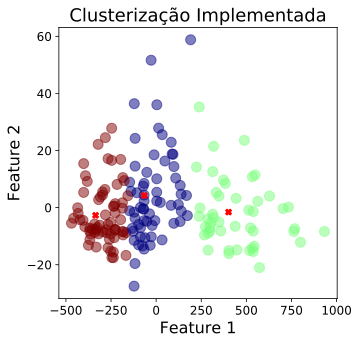

In [10]:
objKMeansImplementado = KMeansImplementado()

yPredImplementado = objKMeansImplementado.main(x, kClusters=nClusters)

centroidesPCAImplementado = PCA(n_components = 2).fit_transform(objKMeansImplementado.vetorCentroides)

printarComCentroides(xPCA, yPredImplementado, centroidesPCAImplementado, "Clusterização Implementada")

## Sklearn

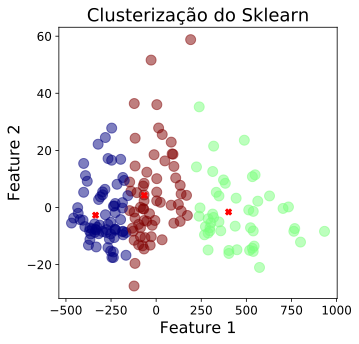

In [11]:
objKMeansSklearn = KMeans(n_clusters = nClusters)
objKMeansSklearn.fit(x)
yPredSklearn = objKMeansSklearn.predict(x)
centroidesSklearnPCA = PCA(n_components = 2).fit_transform(objKMeansSklearn.cluster_centers_)
printarComCentroides(xPCA, yPredSklearn, centroidesSklearnPCA, "Clusterização do Sklearn")

## WB Index

In [12]:
def WBIndex(x, y, centroides):
    ssw = sumSquaresWithin(x, y, centroides)
    ssb = sumSquaresBetween(x, y, centroides)
    return  (len(x) * (ssw/ssb))

def sumSquaresWithin(x, y, centroides):
    
    distanciasAoQuadrado = []
    
    #Primeiro passando de cluster em cluster
    for clusterAtual in range(0, len(centroides)):
        
        #Pra cada cluster eu pego todos os pontos dele
        for index, clusterPontoAtual in enumerate(y):
            if clusterAtual == clusterPontoAtual:
                #Se chegou aqui então eu estou em um ponto do cluster atual
                d = x[index] - centroides[clusterAtual]
                distanciasAoQuadrado.append(d * d)
    
    #Aqui já tenho o vetor distanciasAoQuadrado completo com todos os 
    #pontos em relação aos seus centroides, é só retornar a soma de tudo isso
    distanciasAoQuadrado = numpy.array(distanciasAoQuadrado)    
    
    return numpy.sum(distanciasAoQuadrado)

def sumSquaresBetween(x, y, centroides):
    
    #Primeiro, tenho que achar o X médio de TODOS os pontos 
    #(embaixo da equação 3.9 (pág 24) tem uma representação visual desse x médio)
    xMedio = []
    for dimensaoAtual in range(0, x.shape[1]):
        xMedio.append(numpy.mean(x[:, dimensaoAtual]))
    xMedio = numpy.array(xMedio)
    
    #Beleza, agr já tenho o xMedio, é só aplicar a equação 3.8 e somar tudo como mostra a equação 3.9
    bs = []
    
    for clusterAtual in range(0, len(centroides)):
        #Preciso saber a quantidade de pontos que existem no cluster atual
        qtdPontosClusterAtual = 0
        for clusterPontoAtual in y:
            if clusterPontoAtual == clusterAtual:
                qtdPontosClusterAtual += 1
        
        #agora aplico a equação 3.8...
        d = centroides[clusterAtual] - xMedio
        bs.append(qtdPontosClusterAtual * (d * d))
        
    #...e somo todos os B's como mostra a equação 3.9
    bs = numpy.array(bs)
    
    return numpy.sum(bs)

In [13]:
print("Sklearn:\t", WBIndex(x, y, objKMeansSklearn.cluster_centers_))
print("Implementado:\t", WBIndex(x, y, objKMeansImplementado.vetorCentroides))

Sklearn:	 466.34351606373775
Implementado:	 589.781945108075


## Comparação de métricas com Cross Validation

In [14]:
qtdPacotesKFold = 10

#Instanciando o objeto KFold
objKFold = KFold(n_splits=10, shuffle=True)

# Vetores para armazenar as métricas de cada iteração
silhuetaSklearn = []
silhuetaImplementado = []
WBSklearn = []
WBImplementado = []
calinskiSklearn = []
calinskiImplementado = []

# Começando o método KFold
i = 0
for trainIndex, testIndex in objKFold.split(x):
    i += 1
    
    # Separando os dados
    xTrain, xTest, yTrain, yTest= x[trainIndex], x[testIndex], y[trainIndex], y[testIndex]
    
    # Instanciando os objetos da classe implementada e do Sklearn
    objKMeansImplementado = KMeansImplementado()
    objKMeansSklearn = KMeans(n_clusters = 3)
    
    # Treinamento
    yPredImplementado = objKMeansImplementado.main(xTrain, kClusters=3)
    yPredSklearn = objKMeansSklearn.fit_predict(xTrain)
    
    # Métricas para a algoritmo implementado
    silhuetaImplementado.append(metrics.silhouette_score(xTrain, yPredImplementado))
    WBImplementado.append(WBIndex(xTrain, yPredImplementado, objKMeansImplementado.vetorCentroides))
    calinskiImplementado.append(metrics.calinski_harabaz_score(xTrain, yPredImplementado))
    
    # Métricas para o algoritmo do sklearn
    silhuetaSklearn.append(metrics.silhouette_score(xTrain, yPredSklearn))
    WBSklearn.append(WBIndex(xTrain, yPredSklearn, objKMeansSklearn.cluster_centers_))
    calinskiSklearn.append(metrics.calinski_harabaz_score(xTrain, yPredSklearn))
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


### Coeficiente de Silhueta

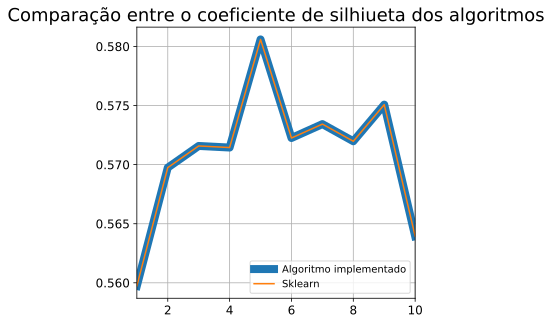

Média da métrica no algoritmo implementado:	 0.5709772287371389
Média da métrica no Sklearn:			 0.5709772287371389


In [15]:
plt.plot(range(1, qtdPacotesKFold + 1), silhuetaImplementado, linewidth=8, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), silhuetaSklearn, label="Sklearn")
plt.title("Comparação entre o coeficiente de silhiueta dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKMeansSilhueta.png', format='png')
plt.show()

print("Média da métrica no algoritmo implementado:\t", numpy.mean(silhuetaImplementado))
print("Média da métrica no Sklearn:\t\t\t", numpy.mean(silhuetaSklearn))

### WB Index

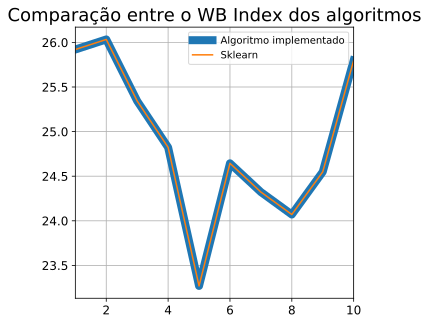

Média da métrica no algoritmo implementado:	 24.87738785325417
Média da métrica no Sklearn:			 24.877387853254174


In [16]:
plt.plot(range(1, qtdPacotesKFold + 1), WBImplementado, linewidth=8, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), WBSklearn, label="Sklearn")
plt.title("Comparação entre o WB Index dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKMeansWBIndex.png', format='png')
plt.show()

print("Média da métrica no algoritmo implementado:\t", numpy.mean(WBImplementado))
print("Média da métrica no Sklearn:\t\t\t", numpy.mean(WBSklearn))

### Variance Ratio Criterion

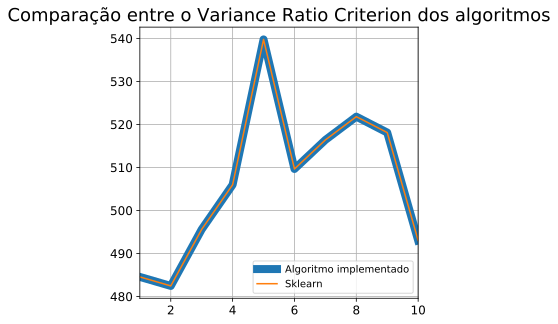

Média da métrica no algoritmo implementado:	 506.7334747238302
Média da métrica no Sklearn:			 506.7334747238302


In [17]:
plt.plot(range(1, qtdPacotesKFold + 1), calinskiImplementado, linewidth=8, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), calinskiSklearn, label="Sklearn")
plt.title("Comparação entre o Variance Ratio Criterion dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKMeansCalinski.png', format='png')
plt.show()

print("Média da métrica no algoritmo implementado:\t", numpy.mean(calinskiImplementado))
print("Média da métrica no Sklearn:\t\t\t", numpy.mean(calinskiSklearn))

### Usando todos os dados da base para fazer o agrupamento

In [18]:
objKMeansImplementado = KMeansImplementado()
    
# Treinamento
yPredImplementado = objKMeansImplementado.main(x, kClusters=3)
    
# Métricas para o algoritmo implementado
print(metrics.silhouette_score(x, yPredImplementado))
print(WBIndex(x, yPredImplementado, objKMeansImplementado.vetorCentroides))
print(metrics.calinski_harabaz_score(x, yPredImplementado))

0.5711381937868844
27.722616452712963
561.815657860671


In [19]:
objKMeansSklearn = KMeans(n_clusters = 3)
    
# Treinamento
yPredSklearn = objKMeansSklearn.fit_predict(x)
    
# Métricas para o algoritmo do sklearn
print(metrics.silhouette_score(x, yPredSklearn))
print(WBIndex(x, yPredSklearn, objKMeansSklearn.cluster_centers_))
print(metrics.calinski_harabaz_score(x, yPredSklearn))

0.5711381937868844
27.722616452712963
561.815657860671
